In [12]:
# Classification Neural Network

In [28]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
# Importing prepared dataset
import pickle
input = open('data.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [35]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [41]:
# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(output_dim = 2, init = 'uniform', activation = 'relu', input_dim = 2))

# Adding the output layer
cnn.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=8, kernel_initializer="uniform")`
  """
C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [42]:
# Fitting the ANN to the Training set
cnn.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
480/480 [==============================] - 0s 941us/step - loss: 0.6872 - accuracy: 0.8292
Epoch 2/100
480/480 [==============================] - 0s 298us/step - loss: 0.6618 - accuracy: 0.8375
Epoch 3/100
480/480 [==============================] - 0s 327us/step - loss: 0.6117 - accuracy: 0.8375
Epoch 4/100
480/480 [==============================] - 0s 300us/step - loss: 0.5485 - accuracy: 0.8375
Epoch 5/100
480/480 [==============================] - 0s 321us/step - loss: 0.4862 - accuracy: 0.8354
Epoch 6/100
480/480 [==============================] - 0s 271us/step - loss: 0.4369 - accuracy: 0.8333
Epoch 7/100
480/480 [==============================] - 0s 325us/step - loss: 0.4010 - accuracy: 0.8333
Epoch 8/100
480/480 [==============================] - 0s 311us/step - loss: 0.3761 - accuracy: 0.8438
Epoch 9/100
480/480 [==============================] - 0s 300us/step - loss: 0.3588 - accuracy: 0.8458
Epoch 10/100
480/480 [==============================] - 0s 319us/step - l

480/480 [==============================] - 0s 360us/step - loss: 0.2814 - accuracy: 0.85830s - loss: 0.2801 - accuracy: 0.85
Epoch 79/100
480/480 [==============================] - 0s 335us/step - loss: 0.2819 - accuracy: 0.8562
Epoch 80/100
480/480 [==============================] - 0s 366us/step - loss: 0.2813 - accuracy: 0.8542
Epoch 81/100
480/480 [==============================] - 0s 325us/step - loss: 0.2812 - accuracy: 0.8562
Epoch 82/100
480/480 [==============================] - 0s 325us/step - loss: 0.2810 - accuracy: 0.8583
Epoch 83/100
480/480 [==============================] - 0s 389us/step - loss: 0.2812 - accuracy: 0.8583
Epoch 84/100
480/480 [==============================] - 0s 321us/step - loss: 0.2813 - accuracy: 0.8604
Epoch 85/100
480/480 [==============================] - 0s 319us/step - loss: 0.2810 - accuracy: 0.8583
Epoch 86/100
480/480 [==============================] - 0s 356us/step - loss: 0.2812 - accuracy: 0.8583
Epoch 87/100
480/480 [=====================

In [43]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5)

In [44]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[55 11]
 [ 5 49]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


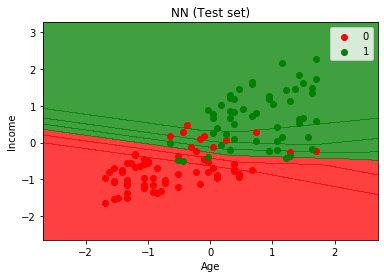

In [45]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, cnn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()